<a href="https://colab.research.google.com/github/CAIKAYUBAKA/hds5210-2023/blob/main/week13/week13_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

Loading the data into the dataframe


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
User uploaded file "diabetes_prediction_dataset.csv" with length 3810356 bytes


In [6]:
import pandas as pd
import numpy as np



The Head Of The Data

In [8]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
number_of_rows = df.shape[0]
number_of_columns = df.shape[1]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [12]:
df.value_counts()

gender  age   hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level  diabetes
Female  80.0  0             0              No Info          27.32  6.2          90                   0           9
                                                                   6.5          159                  0           9
                                                                   4.0          85                   0           8
                                                                   6.6          155                  0           7
                                                                   4.5          140                  0           7
                                                                                                                ..
        48.0  0             0              never            27.32  6.6          200                  0           1
                                                                   6.5          200  

We're going to find the columns (both first and second) with the most unique identifier


In [14]:
unique_counts = df.nunique()

#Find the column with the greatest number of distinct values
sorted_unique = unique_counts.sort_values(ascending=False)

#second most unique columns
max_unique_column = sorted_unique.index[0]
second_max_unique_column = sorted_unique.index[1]

print(f"The column '{max_unique_column}' has the most unique values ({sorted_unique[0]} unique values).")
print(f"The column '{second_max_unique_column}' has the next most unique values ({sorted_unique[1]} unique values).")

The column 'bmi' has the most unique values (4247 unique values).
The column 'age' has the next most unique values (102 unique values).


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

To check for redundancy in columns ie, where all the values are the same.

In [15]:
redundant_columns = [col for col in df.columns if df[col].nunique() == 1]

if redundant_columns:
    print("Columns where all values are the same:")
    for col in redundant_columns:
        print(col)
else:
    print("No columns found where all values are the same.")

No columns found where all values are the same.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

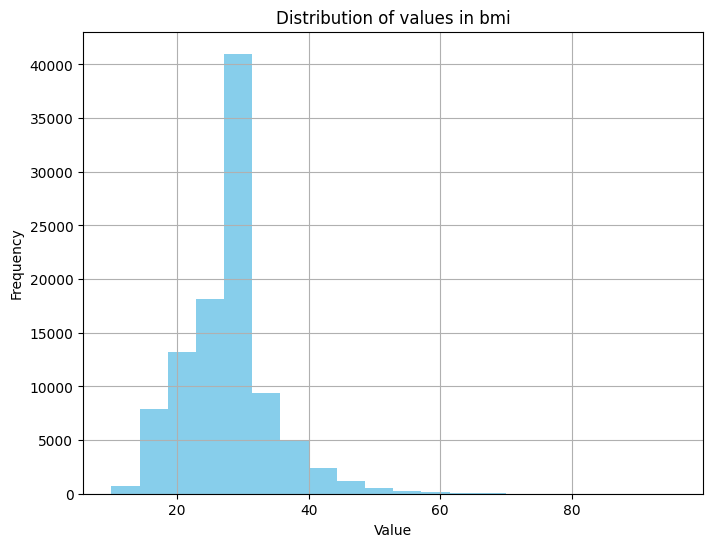

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#Using bmi as column for histogram
numeric_column = 'bmi'

# Check if the column is numeric
if pd.api.types.is_numeric_dtype(df[numeric_column]):
    # Create a histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df['bmi'], bins=20, color='skyblue')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of values in {numeric_column}')
    plt.grid(True)
    plt.show()
else:
    print(f"'{'bmi'}' is not a numeric column.")



### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

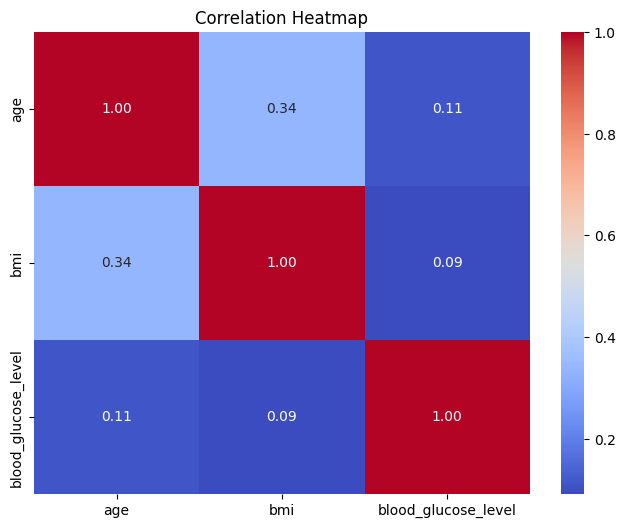

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using age, bmi,blood glucose level as my dataframe columns to check the correlation
selected_columns = ['age', 'bmi', 'blood_glucose_level']

# Create a subset of the DataFrame with the selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Checking for Categorical Variables.

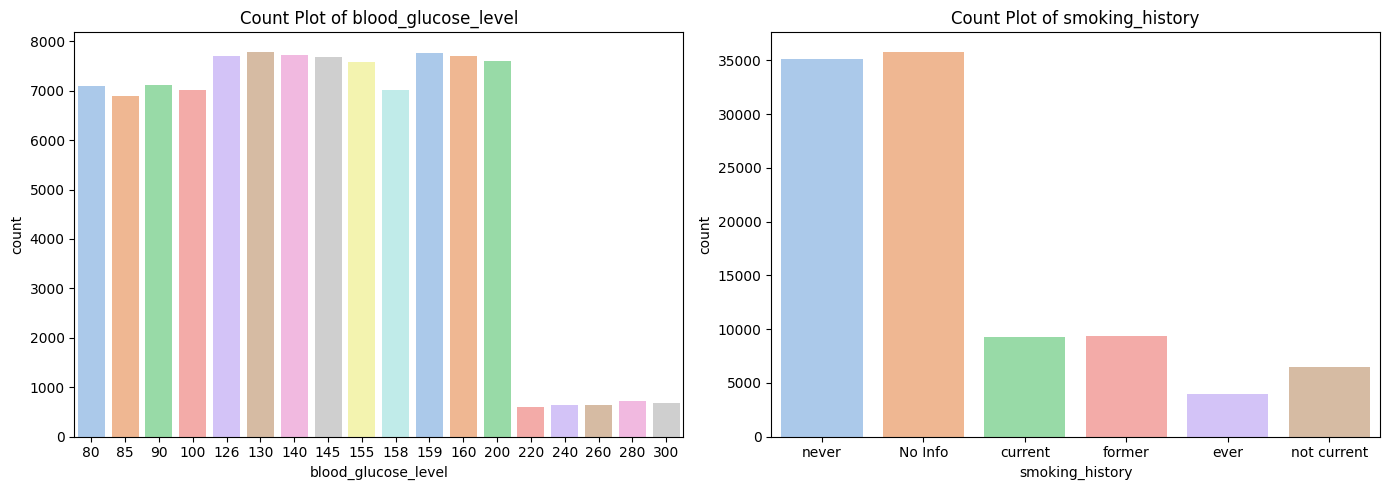

In [24]:
# Combined side-by-side count plot for categorical variables
categorical_columns = ['blood_glucose_level','smoking_history',]
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()



---



## Submitting Your Work

Submit your work as usual.